In [1]:
# The code below demonstrates a sentiment analysis of the Avengers: Endgame movie script 
# in Python using the textblob, vader, and roberta libraries.
# The code was written by me @diguitarrista and is solely for programming demonstration purposes.
# It is not used for commercial or academic purposes
# In[ ] Libraries and list of Avengers names

import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

avengers = ["TONY",
            "STEVE",
            "THOR",
            "NATASHA",
            "BRUCE",
            "CLINT",
            "SCOTT",
            "JAMES",
            "CAROL",
            "DANVERS",
            "PETER PARKER",
            "STEPHEN",
            "T'CHALLA",
            "WANDA",
            "SAM",
            "BUCKY",
            "PETER QUILL",
            "GAMORA",
            "DRAX",
            "ROCKET",
            "GROOT",
            "NEBULA",
            "MANTIS",
            "VALKYRIE",
            "KORG",
            "OKOYE",
            "WONG",
            "PEPPER",
            "HAPPY",
            "NICK",
            "HANK",
            "JANET",
            "THE ANCIENT ONE",
            "HOWARD",
            "HOPE",
            "LOKI",
            "RED",
            "THANOS",
            "EBONY",
            "PROXIMA",
            "CORVUS",
            "CULL",
            "AUNT",
            "LAURA",
            "HARLEY",
            "MIEK"
            ];

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\digui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# In[ ] Read the file and separate the name of the avengers

file_path = 'avengers-endgame-script-pdf.txt'

character_lines = {}  # Use a dictionary to store character lines

with open(file_path, 'r') as file:
    lines = file.readlines()
    for i in range(len(lines)):
        line = lines[i].strip()  # Remove leading/trailing whitespace
        current_line = line

        # Check if the line is in uppercase (assumes character names are all uppercase)
        # and if it has the avenger
        for avenger in avengers:
            if line.isupper() and len(line) < 22 and avenger in current_line:
                if current_line not in character_lines:
                    character_lines[current_line] = []  # Initialize an empty list for the character

                # Append the next line to the character's lines if it's not empty
                if i + 1 < len(lines):
                    next_line = lines[i + 1].strip()
                    if next_line:
                        character_lines[current_line].append(next_line)

In [3]:
# In[ ] Read the file and separate the sentences for each of the avengers

avenger_lines = {}

for avenger in avengers:
    avenger_lines[avenger] = []
    for name, lines in character_lines.items():
        if avenger in name:
            for line in lines:
                avenger_lines[avenger].append(line)

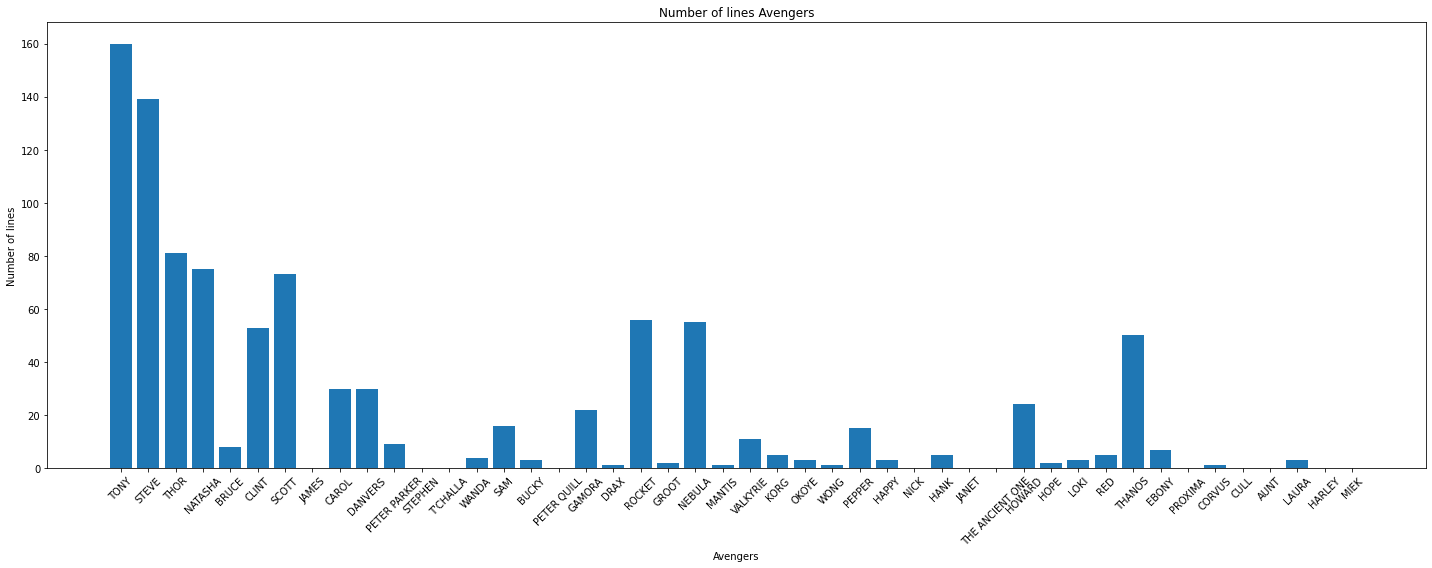

In [4]:
# In[ ] Chart of the number of sentences per avenger

key_lengths = {key: len(value) for key, value in avenger_lines.items()}

keys = list(key_lengths.keys())
lengths = list(key_lengths.values())

plt.figure(figsize=(20, 8))  

plt.bar(keys, lengths)
plt.xlabel('Avengers')
plt.ylabel('Number of lines')
plt.title('Number of lines Avengers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

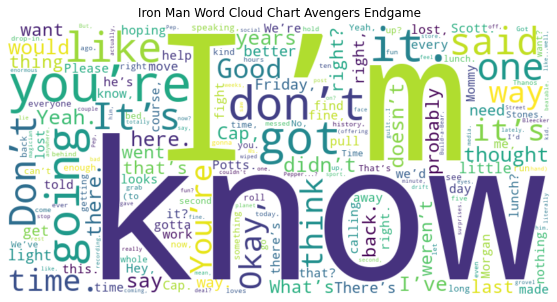

In [5]:
# In[ ] Word cloud chart for Iron Man

phrases = avenger_lines["TONY"]

# Combine all the phrases into a single text string
text = ' '.join(phrases)

# Tokenize the text into words
words = text.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Create a plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Iron Man Word Cloud Chart Avengers Endgame')

# Show the plot
plt.show()

In [6]:
# In[ ] Sentiment Analysis using TextBlob

from textblob import TextBlob

# Initialize variables for sentiment calculation
total_polarity = 0
num_phrases = len(avenger_lines["TONY"])

# Perform sentiment analysis on each phrase and calculate total polarity
for phrase in avenger_lines["TONY"]:
    analysis = TextBlob(phrase)
    
    # Get sentiment polarity (positive, negative, or neutral)
    sentiment = analysis.sentiment.polarity
    
    # Add the polarity to the total
    total_polarity += sentiment

# Calculate the overall sentiment score
overall_sentiment = total_polarity / num_phrases

# Define sentiment labels based on the overall score
if overall_sentiment > 0:
    overall_sentiment_label = "Positive"
elif overall_sentiment < 0:
    overall_sentiment_label = "Negative"
else:
    overall_sentiment_label = "Neutral"

# Print the overall sentiment score
print(f"Overall Sentiment: {overall_sentiment_label} (Score: {overall_sentiment})")

Overall Sentiment: Positive (Score: 0.094288132006882)


In [7]:
# In[ ] Sentiment Analysis using VADER

import nltk

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables for sentiment calculation
total_compound_score = 0

# Perform sentiment analysis on each phrase and calculate total compound score
for phrase in avenger_lines["TONY"]:
    sentiment_scores = analyzer.polarity_scores(phrase)
    
    # Get the compound sentiment score (a value between -1 and 1)
    compound_score = sentiment_scores['compound']
    
    # Add the compound score to the total
    total_compound_score += compound_score

# Calculate the overall sentiment score
overall_sentiment = total_compound_score / len(avenger_lines["TONY"])

# Define sentiment labels based on the overall score
if overall_sentiment > 0:
    overall_sentiment_label = "Positive"
elif overall_sentiment < 0:
    overall_sentiment_label = "Negative"
else:
    overall_sentiment_label = "Neutral"

# Print the overall sentiment score
print(f"Overall Sentiment: {overall_sentiment_label} (Score: {overall_sentiment})")

Overall Sentiment: Positive (Score: 0.10867562500000003)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\digui\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# In[ ] Sentiment Analysis using Roberta

import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import pipeline

# Load the pre-trained RoBERTa model and tokenizer for sentiment analysis
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

# Initialize a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Initialize variables to accumulate sentiment scores
total_sentiment_score = 0.0
num_phrases = len(avenger_lines["TONY"])

# Perform sentiment analysis on each phrase and accumulate the scores
for phrase in avenger_lines["TONY"]:
    results = sentiment_analysis(phrase)
    sentiment_score = results[0]["score"]
    total_sentiment_score += sentiment_score

# Calculate the average sentiment score
average_sentiment_score = total_sentiment_score / num_phrases

# Determine the overall sentiment based on the average score
overall_sentiment = "POSITIVE" if average_sentiment_score > 0.5 else "NEGATIVE"

# Print the overall sentiment result
print(f"Overall Sentiment for TONY's phrases: {overall_sentiment}")
print(f"Average Sentiment Score: {average_sentiment_score}")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Overall Sentiment for TONY's phrases: POSITIVE
Average Sentiment Score: 0.5265610240399837


In [9]:
# In[ ] Sentiment Analysis using TextBlob of all lines for each avenger

# Initialize the avengers_sentimental_textblob dictionary
avengers_sentimental_textblob = {}
avengers_sentimental_textblob_avarage_score = 0 

# Iterate through each character's lines in the avenger_lines dictionary
for character, lines in avenger_lines.items():
    # Initialize variables for sentiment calculation for each character
    total_polarity = 0
    num_phrases = len(lines)

    # Perform sentiment analysis on each phrase and calculate total polarity
    for phrase in lines:
        analysis = TextBlob(phrase)

        # Get sentiment polarity (positive, negative, or neutral)
        sentiment = analysis.sentiment.polarity

        # Add the polarity to the total
        total_polarity += sentiment

    # Calculate the overall sentiment score for the character's lines
    if total_polarity > 0:
        overall_sentiment = total_polarity / num_phrases
    else: 
        overall_sentiment = 0
        
    # Determine the overall sentiment based on the average score
    if overall_sentiment > 0:
        overall_sentiment_label = "POSITIVE" 
    elif overall_sentiment == 0:
        overall_sentiment_label = "NEUTRAL" 
    else: 
        overall_sentiment_label = "NEGATIVE"

    # Store the character's sentiment in the avengers_sentimental_textblob dictionary
    avengers_sentimental_textblob[character] = {
        "Overall Sentiment": overall_sentiment_label,
        "Sentiment Score": overall_sentiment
    }
    
    avengers_sentimental_textblob_avarage_score += overall_sentiment / len(avenger_lines.keys())

In [10]:
# In[ ] Convert the dicitonary avengers_sentimental_textblob into a dataframe

# Create a DataFrame from the avengers_sentimental_textblob dictionary
df = pd.DataFrame(avengers_sentimental_textblob).T

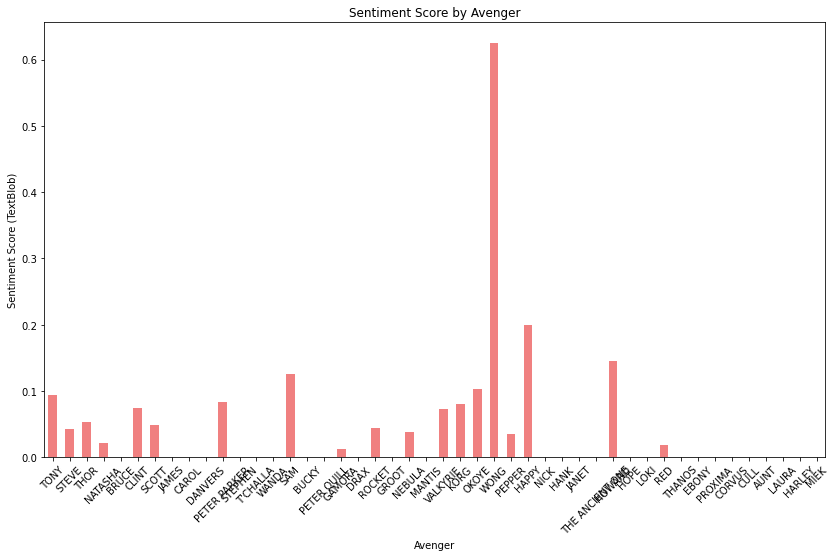

In [11]:
# In[ ] Chart of the average sentiment score for each avenger using TextBlob

# Adjust the figure size
plt.figure(figsize=(14, 8))  # Change the width (12) and height (6) as needed

# Chart for Sentiment Score versus Avenger
df['Sentiment Score'].plot(kind='bar', color='lightcoral')
plt.title('Sentiment Score by Avenger')
plt.xlabel('Avenger')
plt.ylabel('Sentiment Score (TextBlob)')
plt.xticks(rotation=45)
plt.show()

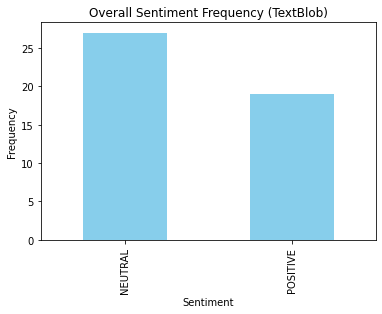

In [12]:
# In[ ] Chart of the overall sentiments TextBlob

# Frequency chart for Overall Sentiment
sentiment_counts = df['Overall Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Overall Sentiment Frequency (TextBlob)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [13]:
# In[ ] Sentiment Analysis using VADER of all lines for each avenger

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize a dictionary to store sentiment scores for each character
avengers_sentimental_vader = {}
avengers_sentimental_vader_avarage_score = 0

# Loop through all keys in the avenger_lines dictionary
for character, lines in avenger_lines.items():
    total_compound_score = 0

    # Perform sentiment analysis on each phrase for the current character
    for phrase in lines:
        sentiment_scores = analyzer.polarity_scores(phrase)

        # Get the compound sentiment score (a value between -1 and 1)
        compound_score = sentiment_scores['compound']

        # Add the compound score to the total
        total_compound_score += compound_score

    # Calculate the overall sentiment score for the current character
    if total_compound_score > 0:
        overall_sentiment = total_compound_score / len(lines)
    else:
        overall_sentiment = 0

    # Determine the overall sentiment based on the average score
    if overall_sentiment > 0:
        overall_sentiment_label = "POSITIVE" 
    elif overall_sentiment == 0:
        overall_sentiment_label = "NEUTRAL" 
    else: 
        overall_sentiment_label = "NEGATIVE"

    # Store the overall sentiment score and label in the new dictionary
    avengers_sentimental_vader[character] = {
        "Overall Sentiment": overall_sentiment_label,
        "Sentiment Score": overall_sentiment
    }
    
    avengers_sentimental_vader_avarage_score += overall_sentiment / len(avenger_lines.keys())

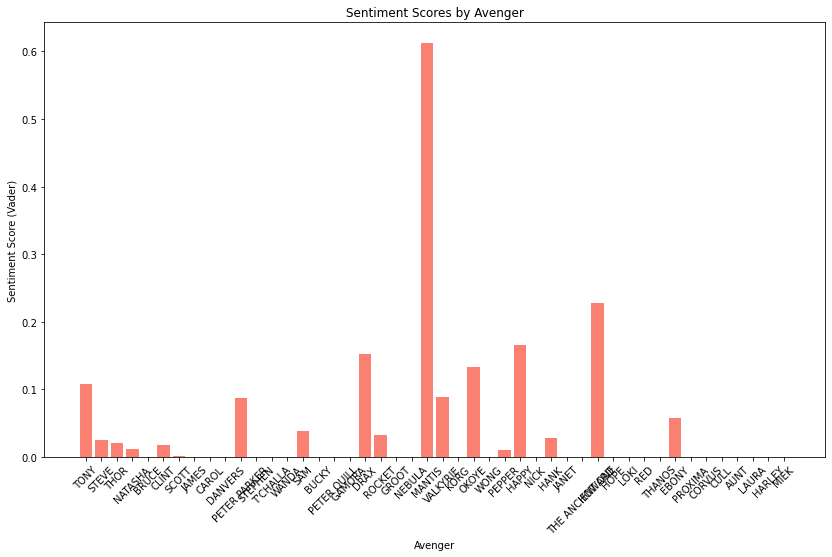

In [14]:
# In[ ] Chart of the average sentiment score for each avenger using Vader

# Create lists to store sentiment labels and scores
sentiment_labels = []
sentiment_scores = []

# Extract sentiment information from the avengers_sentimental_vader dictionary
for character, sentiment in avengers_sentimental_vader.items():
    sentiment_labels.append(sentiment['Overall Sentiment'])
    sentiment_scores.append(sentiment['Sentiment Score'])

# Create a bar chart for sentiment scores by Avenger
plt.figure(figsize=(14, 8))
plt.bar(avengers_sentimental_vader.keys(), sentiment_scores, color='salmon')
plt.title('Sentiment Scores by Avenger')
plt.xlabel('Avenger')
plt.ylabel('Sentiment Score (Vader)')
plt.xticks(rotation=45)
plt.show()

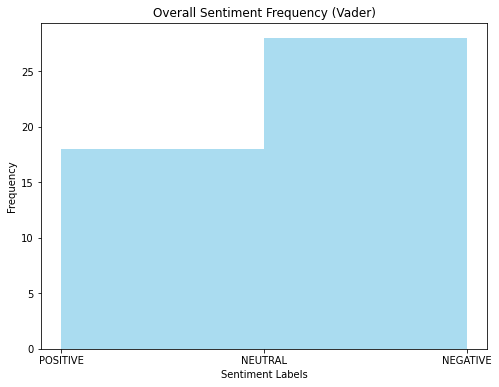

In [15]:
# In[ ] Chart of the overall sentiments using Vader

# Create a frequency chart for Overall Sentiment labels
plt.figure(figsize=(8, 6))
plt.hist(sentiment_labels, bins=['POSITIVE', 'NEUTRAL', 'NEGATIVE'], alpha=0.7, color='skyblue')
plt.title('Overall Sentiment Frequency (Vader)')
plt.xlabel('Sentiment Labels')
plt.ylabel('Frequency')
plt.show()

In [16]:
# In[ ] Sentiment Analysis using Roberta of all lines for each avenger

from collections import defaultdict

# Create a dictionary to store cumulative sentiment scores
avengers_sentimental_roberta = defaultdict(float)
avengers_sentimental_roberta_avarage_score = 0

# Iterate through each key in avenger_lines
for key, phrases in avenger_lines.items():
    total_sentiment_score = 0.0
    num_phrases = len(phrases)

    # Perform sentiment analysis on each phrase and accumulate the scores
    for phrase in phrases:
        results = sentiment_analysis(phrase)
        sentiment_score = results[0]["score"]
        total_sentiment_score += sentiment_score
    
    # Calculate the average sentiment score
    if total_sentiment_score > 0: 
        average_sentiment_score = total_sentiment_score / num_phrases
    else:
        average_sentiment_score = 0

    # Determine the overall sentiment based on the average score
    if average_sentiment_score > 0.5:
        overall_sentiment = "POSITIVE" 
    elif average_sentiment_score == 0:
        overall_sentiment = "NEUTRAL" 
    else: 
        overall_sentiment = "NEGATIVE"
        
    # Store the cumulative sentiment score for the current key
    avengers_sentimental_roberta[key] = [average_sentiment_score, overall_sentiment]
    
    avengers_sentimental_roberta_avarage_score += average_sentiment_score / len(avenger_lines.keys())

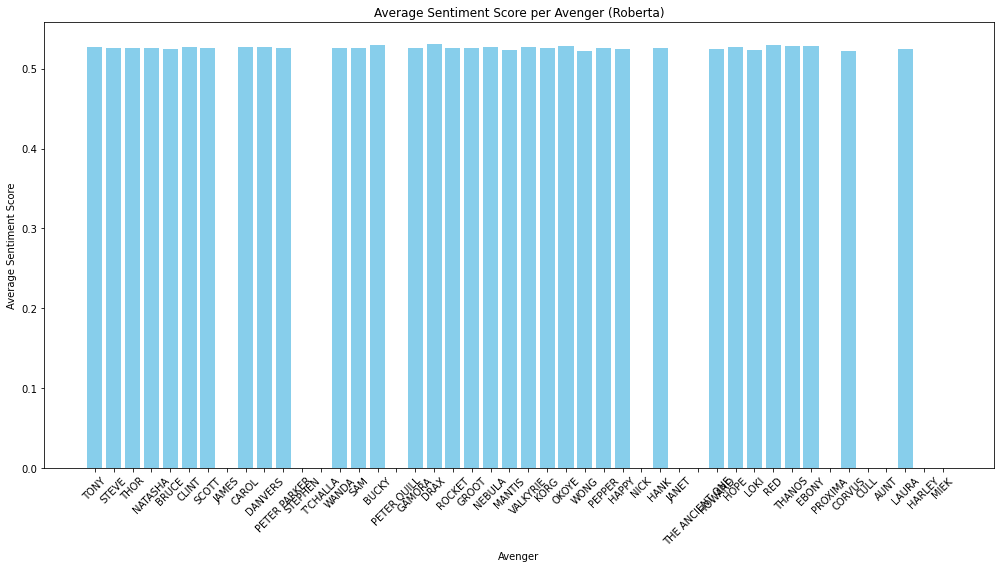

In [17]:
# In[ ] Chart of the average sentiment score for each avenger using Roberta

# Extract Avenger names, average sentiment scores, and overall sentiment scores
avengers = list(avengers_sentimental_roberta.keys())
average_sentiments = [entry[0] for entry in avengers_sentimental_roberta.values()]

# Create the first chart for average_sentiment_score
plt.figure(figsize=(14, 8))
plt.bar(avengers, average_sentiments, color='skyblue')
plt.xlabel('Avenger')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Avenger (Roberta)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the first chart
plt.show()

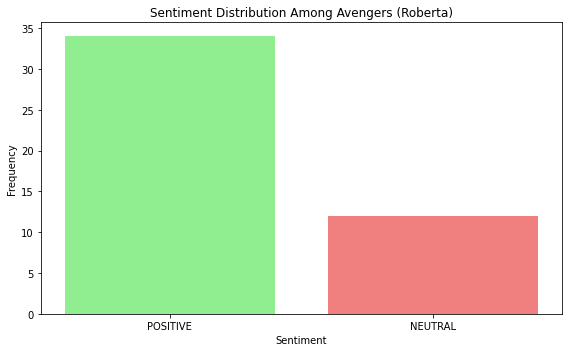

In [18]:
# In[ ] Chart of the overall sentiments using Roberta

# Extract overall sentiments
overall_sentiments = [entry[1] for entry in avengers_sentimental_roberta.values()]

# Count the occurrences of each sentiment
sentiment_counts = Counter(overall_sentiments)

# Define the sentiment labels and counts
sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(sentiments, counts, color=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution Among Avengers (Roberta)')
plt.tight_layout()

# Show the chart
plt.show()

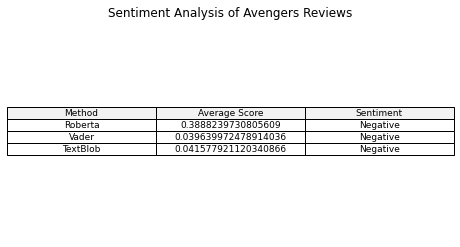

In [19]:
# In[ ] Sentimental analysis including values ​​equal to zero

# Data
data = {
    'Method': ['Roberta', 'Vader', 'TextBlob'],
    'Average Score': [avengers_sentimental_roberta_avarage_score, 
                      avengers_sentimental_vader_avarage_score, 
                      avengers_sentimental_textblob_avarage_score]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to determine sentiment
def determine_sentiment(score):
    return 'Positive' if score > 0.5 else 'Negative'

# Apply the sentiment determination function to the 'Average Score' column
df['Sentiment'] = df['Average Score'].apply(determine_sentiment)

# Plot the table
plt.figure(figsize=(8, 4))
plt.axis('off')  # Hide axis
plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=['#f2f2f2']*df.shape[1])
plt.title('Sentiment Analysis of Avengers Reviews')
plt.show()